# Usage of the `ImageMask` class

In [1]:
import os

import sys
sys.path.append('..')

from maskmaker import ImageMask

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import PIL.Image as Image

The default fill is white, but since we want to display it inline, we'll use red

In [3]:
RED_FILL = (255, 0, 0)

In [4]:
imask = ImageMask('./bottles_174.xml', polygon_fill=RED_FILL)

## Inspecting the imask object

What was the original image name?

In [5]:
imask.image_name

'bottles_174.jpg'

How many masks does this image have?

In [6]:
len(imask.masks)

26

What are these masks of?

In [7]:
imask.annotations

['bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle',
 'bottle']

## Visualizations

In [8]:
img = plt.imread('bottles_174.jpg')

In [9]:
import numpy as np

In [10]:
def convert_color(img, src_color, dest_color):
    t = np.array(img)
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            if all(t[i, j, :] == src_color):
                t[i, j] = dest_color

    return Image.fromarray(t)

In [11]:
k = 0

In [12]:
RED = np.array((255, 0, 0, 255))
GREEN = np.array((0, 255, 0, 255))
BLUE = np.array((0, 0, 255, 255))
BLACK = np.array((0, 0, 0, 255))
GREY = np.array((128, 128, 128, 255))
PURPLE = np.array((255, 0, 255, 255))

colors = [RED, GREEN, BLUE, BLACK, GREY, PURPLE]

In [13]:
for i in range(0, len(imask.masks)):
    imask.masks[i] = convert_color(imask.masks[i], RED, colors[k])
    k = (k + 1) % len(colors)

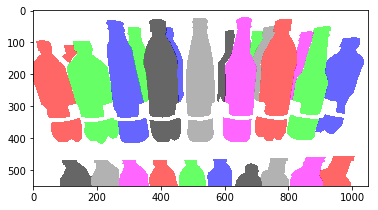

In [14]:
for mask in imask.masks:
    plt.imshow(mask, alpha=0.6)

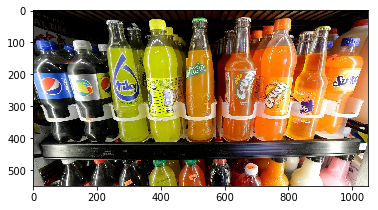

In [15]:
_ = plt.imshow(img)

We can save these masks to a directory of our choice:

In [16]:
output_dir = 'Masks'

In [17]:
imask.save_masks(output_dir=output_dir)

In [18]:
os.listdir(output_dir)

['010_bottle.png',
 '001_bottle.png',
 '018_bottle.png',
 '004_bottle.png',
 '015_bottle.png',
 '022_bottle.png',
 '009_bottle.png',
 '012_bottle.png',
 '025_bottle.png',
 '003_bottle.png',
 '006_bottle.png',
 '020_bottle.png',
 '017_bottle.png',
 '019_bottle.png',
 '005_bottle.png',
 '014_bottle.png',
 '023_bottle.png',
 '008_bottle.png',
 '011_bottle.png',
 '000_bottle.png',
 '007_bottle.png',
 '021_bottle.png',
 '016_bottle.png',
 '013_bottle.png',
 '024_bottle.png',
 '002_bottle.png']

Let's clean up:

In [19]:
for f in os.listdir(output_dir):
    os.remove(output_dir + '/' + f)
os.rmdir(output_dir)